<h1><center> Assignment 1: EDA United Nations General Debate Corpus  </center></h1>

We are now going to give the first steps into exploring the United Nations General Debate Corpus. <span style="color:red">This dataset will be used in Group Assignment I (due date, Monday 4 October, 23:59)</span>. It is expected that you will pose a questions about the dataset, explore it, and combine it with other datasets (e.g., the Happiness Report 2021 that we've been using). 

We will use the *the UN General Debate Corpus (UNGDC)*, which introduces the corpus of texts of UN General Debate statements from 1970 (Session 25) to 2020 (Session 75). More info [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0TJX8Y). Make sure to download the file <code>UNGDC_1970-2020.tar.gz</code> and extract the folder <code>TXT/</code> to the same directory as the current Jupyter notebook. 

Notice that the 76th session of the UN General Assembly - where the 2021 debates will happen - will occur in 14-30 September 2021, precisely during the time you'll be working in Assignment 1. More info [here](https://www.un.org/en/ga/76/meetings/). 

You might find useful to have a dataset with the full name and 3-code description of countries. You can find that date [here](https://unstats.un.org/unsd/methodology/m49/overview/). Download the correspondig CSV file (named 'UNSD — Methodology.csv') and place it into the same folder as this notebook.

We will start by loading the speeches text to a table:

In [ ]:
!pip3 install wordcloud
!pip3 install unicodedata

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "../data/TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename), errors="ignore")
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Session,Year,ISO-alpha3 Code,Speech
8476,75,2020,WSM,"Mr. President,\nDistinguished delegates,\nLadi..."
8477,75,2020,YEM,In the name of God the Merciful and the Compas...
8478,75,2020,ZAF,"President of the General Assembly, Secretary-G..."
8479,75,2020,ZMB,"Your excellency Mr. Volkan Bozkir, President o..."
8480,75,2020,ZWE,"Your Excellency, Ambassador Volkan Bozkir, Pre..."


In [69]:
columns = ["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Developed / Developing Countries", "Session", "Year", "Speech"]
df_codes = pd.read_csv('../data/UNSD — Methodology.csv', delimiter=";")
df_un_members = df_codes.merge(df_speech)[:].set_index(["Year", "ISO-alpha3 Code"])
# import to sort the index.
df_un_members.sort_index(level=["Year", "ISO-alpha3 Code"], ascending=[1,1], inplace=True)
df_un_members.head()

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Global Code Global Name  Region Code Region Name  \
Year ISO-alpha3 Code                                                     
1970 ALB                        1       World        150.0      Europe   
     ARG                        1       World         19.0    Americas   
     AUS                        1       World          9.0     Oceania   
     AUT                        1       World        150.0      Europe   
     BEL                        1       World        150.0      Europe   

                      Sub-region Code                  Sub-region Name  \
Year ISO-alpha3 Code                                                     
1970 ALB                         39.0                  Southern Europe   
     ARG                        419.0  Latin America and the Caribbean   
     AUS                         53.0        Australia and New Zealand   
     AUT                        155.0                   Western Europe   
     BEL                        155.0                   Western Europe   

                      Intermediate Region Code Intermediate Region Name  \
Year ISO-alpha3 Code                                                      
1970 ALB                                   NaN                      NaN   
     ARG                                   5.0            South America   
     AUS                                   NaN                      NaN   
     AUT                                   NaN                      NaN   
     BEL                                   NaN                      NaN   

                     Country or Area  M49 Code ISO-alpha2 Code  \
Year ISO-alpha3 Code                                             
1970 ALB                     Albania         8              AL   
     ARG                   Argentina        32              AR   
     AUS                   Australia        36              AU   
     AUT                     Austria        40              AT   
     BEL                     Belgium        56              BE   

                     Least Developed Countries (LDC)  \
Year ISO-alpha3 Code                                   
1970 ALB                                         NaN   
     ARG                                         NaN   
     AUS                                         NaN   
     AUT                                         NaN   
     BEL                                         NaN   

                     Land Locked Developing Countries (LLDC)  \
Year ISO-alpha3 Code                                           
1970 ALB                                                 NaN   
     ARG                                                 NaN   
     AUS                                                 NaN   
     AUT                                                 NaN   
     BEL                                                 NaN   

                     Small Island Developing States (SIDS)  \
Year ISO-alpha3 Code                                         
1970 ALB                                               NaN   
     ARG                                               NaN   
     AUS                                               NaN   
     AUT                                               NaN   
     BEL                                               NaN   

                     Developed / Developing Countries  Session  \
Year ISO-alpha3 Code                                             
1970 ALB                                    Developed       25   
     ARG                                   Developing       25   
     AUS                                    Developed       25   
     AUT                                    Developed       25   
     BEL                                    Developed       25   

                                                                 Speech  
Year ISO-alpha3 Code                                                     
1970 ALB              33: May I first convey to our President the co...  
     ARG              177.\t : It

x

In [4]:
df_un_yearly_members = pd.read_csv('../data/un_members_per_year.csv', delimiter=';', index_col=1)
df_un_yearly_members.head()

,Number of members
Year,
1945,51
1946,55
1947,57
1948,58
1949,59


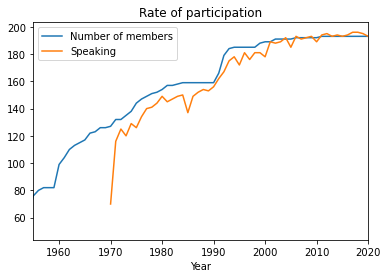

In [12]:
number_of_speeches = df_speech.groupby('Year')['Speech'].count()
number_of_members = df_un_yearly_members['Number of members']

fig, ax = plt.subplots()
ax.plot(number_of_members, label="Number of members")
ax.plot(number_of_speeches, label="Speaking")
ax.set_xlim([1955,2020])
ax.xaxis.label.set_text("Year")
ax.legend()
ax.title.set_text("Rate of participation")

# Subject analysis


In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Preprocessing
In order to satisfy
- Filter out countries
- Abbreviations
- Stemming
- Lemmexiation

https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e

https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21

# Create 
- Further classify

# Resources
https://realpython.com/nltk-nlp-python/#using-named-entity-recognition-ner

In [ ]:
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords
import unicodedata
stop_words = stopwords.words("english")
country_names = np.char.lower(np.unique(df_un_members["Country or Area"].values).astype('U'))
country_names = np.append(country_names, ['soviet', 'united nations', 'us', 'uk'])
def preprocess(words):
    processed_words = []
    for w in words:
        if(not w.isalpha()):
            continue
        w = remove_accents(w)
        processed_words.append(w.lower())
    return processed_words

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

def remove_stop_words(words):
    good_words = []
    for word in words:
        if (word not in stop_words):
            good_words.append(word)
    return good_words

def remove_country_name(words):
    contextual_words = []
    for word in words:
        if(not any(word in country_name.split() for country_name in country_names)):
            contextual_words.append(word)
    return contextual_words

def tokenize(speech):
    tokenized = word_tokenize(speech)
    tokenized = preprocess(tokenized)
    tokenized = remove_stop_words(tokenized)
    #tokenized = remove_country_name(tokenized)
    return tokenized

def tokenize_row(row):    
    speech = row['Speech']
    return tokenize(speech)


In [ ]:
text = df_un_members.loc[2002,"UGB"]["Speech"]
unique_words = tokenize(text)
print(len(unique_words))
FreqDist(unique_words).plot(30)


# Attempt 2

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [62]:
df_un_members.head()
print(df_un_members.index.names)
df_un_members.columns

['Year', 'ISO-alpha3 Code']


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Country or Area', 'Region Name', 'Sub-region Name',
       'Developed / Developing Countries', 'Session', 'Speech',
       'speech_processed', 'speech_cleaned'],
      dtype='object')

In [23]:
import re

# EDA
#seventies = df_un_members.loc(axis=0)[1970:1980,:]
df_un_members["speech_processed"] = df_un_members["Speech"].map(lambda speech: re.sub('[,\.!?]', '', speech))
df_un_members["speech_processed"] = df_un_members["speech_processed"].map(lambda speech: speech.lower())
df_un_members.head()

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-23-5f205b18e28a>:5: DeprecationWarning: invalid escape sequence \.
  df_un_members["speech_processed"] = df_un_members["Speech"].map(lambda speech: re.sub('[,\.!?]', '', speech))


Country or Area Region Name  \
Year ISO-alpha3 Code                               
1970 ALB                     Albania      Europe   
     ARG                   Argentina    Americas   
     AUS                   Australia     Oceania   
     AUT                     Austria      Europe   
     BEL                     Belgium      Europe   

                                      Sub-region Name  \
Year ISO-alpha3 Code                                    
1970 ALB                              Southern Europe   
     ARG              Latin America and the Caribbean   
     AUS                    Australia and New Zealand   
     AUT                               Western Europe   
     BEL                               Western Europe   

                     Developed / Developing Countries  Session  \
Year ISO-alpha3 Code                                             
1970 ALB                                    Developed       25   
     ARG                                   Developing       25   
     AUS                                    Developed       25   
     AUT                                    Developed       25   
     BEL                                    Developed       25   

                                                                 Speech  \
Year ISO-alpha3 Code                                                      
1970 ALB              33: May I first convey to our President the co...   
     ARG              177.\t : It is a fortunate coincidence that pr...   
     AUS              100.\t  It is a pleasure for me to extend to y...   
     AUT              155.\t  May I begin by expressing to Ambassado...   
     BEL              176. No doubt each of us, before coming up to ...   

                                                       speech_processed  
Year ISO-alpha3 Code                                                     
1970 ALB              33: may i first convey to our president the co...  
     ARG              177\t : it is a fortunate coincidence that pre...  
     AUS              100\t  it is a pleasure for me to extend to yo...  
     AUT              155\t  may i begin by expressing to ambassador...  
     BEL              176 no doubt each of us before coming up to th...

In [56]:
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words.extend(['united', 'nations', 'general', 'assembly', 'international', 'country', 'countries', 'people', 'peoples', 'world', 'us', ])
countries = [country.lower() for country in df_codes["Country or Area"].values]
stop_words.extend(countries)

['algeria', 'egypt', 'libya', 'morocco', 'sudan', 'tunisia', 'western sahara', 'british indian ocean territory', 'burundi', 'comoros', 'djibouti', 'eritrea', 'ethiopia', 'french southern territories', 'kenya', 'madagascar', 'malawi', 'mauritius', 'mayotte', 'mozambique', 'réunion', 'rwanda', 'seychelles', 'somalia', 'south sudan', 'uganda', 'united republic of tanzania', 'zambia', 'zimbabwe', 'angola', 'cameroon', 'central african republic', 'chad', 'congo', 'democratic republic of the congo', 'equatorial guinea', 'gabon', 'sao tome and principe', 'botswana', 'eswatini', 'lesotho', 'namibia', 'south africa', 'benin', 'burkina faso', 'cabo verde', 'côte d’ivoire', 'gambia', 'ghana', 'guinea', 'guinea-bissau', 'liberia', 'mali', 'mauritania', 'niger', 'nigeria', 'saint helena', 'senegal', 'sierra leone', 'togo', 'anguilla', 'antigua and barbuda', 'aruba', 'bahamas', 'barbados', 'bonaire, sint eustatius and saba', 'british virgin islands', 'cayman islands', 'cuba', 'curaçao', 'dominica', 

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
             
vectorYears = df_un_members.loc(axis=0)[2015,:]
data = df_un_members.speech_processed.values.tolist()
data_words = list(sent_to_words(data))# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['may', 'first', 'convey', 'president', 'congratulations', 'albanian', 'delegation', 'election', 'presidency', 'twenty', 'fifth', 'session', 'taking', 'work', 'agenda', 'twenty', 'fifth', 'session', 'held', 'eve', 'twenty', 'fifth', 'anniversary', 'coming', 'force', 'charter', 'peace', 'loving', 'member', 'states']


In [58]:
df_un_members["speech_cleaned"] = data_words
df_un_members["speech_cleaned"] = df_un_members["speech_cleaned"].map(lambda array: " ".join(array))
df_un_members_cleaned = df_un_members.drop("Speech", axis=1).drop("speech_processed", axis=1)
df_un_members_cleaned.head()
df_un_members_cleaned.to_csv("../data/speeches_cleaned.csv")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


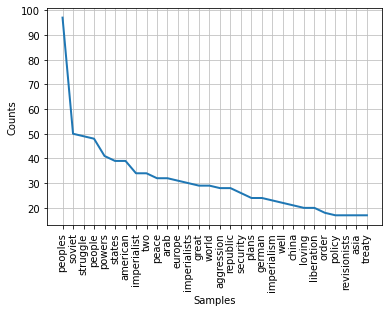

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [36]:
from nltk.probability import FreqDist
from nltk import word_tokenize

# tokenize words
words = word_tokenize(' '.join(data_words[0]))

# compute word frequency
freq = FreqDist(words)

# show 30 most frequent words
freq.most_common(30)
freq.plot(30)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


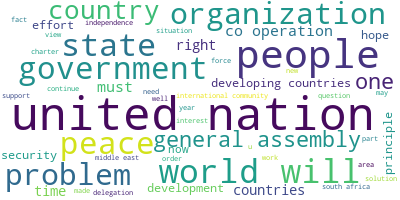

In [22]:
# Wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', max_words=50, contour_width=3, contour_color='steelblue')

seventies = df_un_members_cleaned.loc(axis=0)[1970:1980,:]
long_string = ','.join(list(seventies["speech_processed"].values))
wordcloud.generate(long_string)
wordcloud.to_image()

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


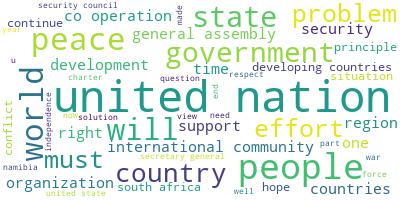

In [21]:
eighties = df_un_members_cleaned.loc(axis=0)[1980:1990,:]
long_string = ','.join(list(eighties["speech_processed"].values))
wordcloud.generate(long_string)
wordcloud.to_image()

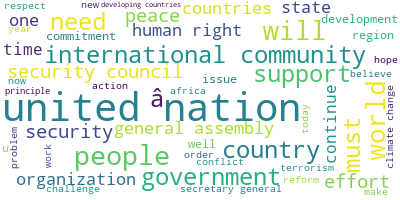

In [9]:
naughties = df_un_members_cleaned.loc(axis=0)[2000:2010,:]
long_string = ','.join(list(naughties["speech_processed"].values))
wordcloud.generate(long_string)
wordcloud.to_image()

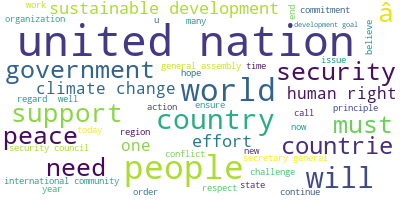

In [10]:
tens = df_un_members_cleaned.loc(axis=0)[2010:2020,:]
long_string = ','.join(list(tens["speech_processed"].values))
wordcloud.generate(long_string)
wordcloud.to_image()

In [17]:
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words.extend(['united', 'nations', 'general', 'assembly'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
             
vectorYears = df_un_members.loc(axis=0)[2015,:]
data = vectorYears.speech_processed.values.tolist()
data_words = list(sent_to_words(data))# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['gives', 'great', 'pleasure', 'behalf', 'islamic', 'republic', 'afghanistan', 'express', 'sincere', 'congratulations', 'presidenta', 'well', 'deserved', 'election', 'president', 'seventieth', 'session', 'also', 'express', 'deep', 'gratitude', 'secretary', 'ban', 'ki', 'moon', 'hands', 'leadership', 'organization', 'demanding', 'time']


In [18]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 15), (15, 1), (16, 2), (17, 1), (18, 4), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 5), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
from pprint import pprint
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.009*"international" + 0.008*"development" + 0.008*"world" + '
  '0.007*"security" + 0.005*"states" + 0.005*"countries" + 0.005*"people" + '
  '0.005*"must" + 0.004*"also" + 0.004*"rights"'),
 (1,
  '0.008*"development" + 0.007*"security" + 0.005*"countries" + 0.005*"us" + '
  '0.005*"also" + 0.005*"international" + 0.004*"country" + 0.004*"states" + '
  '0.004*"human" + 0.004*"global"'),
 (2,
  '0.010*"development" + 0.008*"world" + 0.006*"international" + 0.006*"peace" '
  '+ 0.005*"security" + 0.005*"countries" + 0.005*"us" + 0.004*"people" + '
  '0.004*"also" + 0.004*"human"'),
 (3,
  '0.007*"security" + 0.007*"peace" + 0.007*"world" + 0.006*"international" + '
  '0.006*"development" + 0.006*"also" + 0.006*"people" + 0.006*"countries" + '
  '0.005*"human" + 0.005*"states"'),
 (4,
  '0.009*"international" + 0.008*"security" + 0.008*"development" + '
  '0.007*"world" + 0.006*"peace" + 0.006*"must" + 0.006*"countries" + '
  '0.005*"human" + 0.005*"people" + 0.004*"states"'),


In [20]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        # load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.002013  0.004398       1        1  34.338800
4     -0.002341 -0.002367       2        1  18.487042
7     -0.000766 -0.000362       3        1  13.408060
6     -0.001470  0.001579       4        1   9.596346
8     -0.001601  0.000801       5        1   9.498038
0      0.000128 -0.001831       6        1   3.987643
5      0.000351 -0.003166       7        1   3.854049
9     -0.000140 -0.001023       8        1   3.570530
2      0.000564  0.000969       9        1   3.040691
1      0.007288  0.001001      10        1   0.218801, topic_info=              Term         Freq        Total Category  logprob  loglift
152    development  1535.000000  1535.000000  Default  30.0000  30.0000
530       security  1369.000000  1369.000000  Default  29.0000  29.0000
320  international  1623.000000  1623.000000  Default  28.0000  28.0000
669          world  1396.000000  1396.000000  Default  27.0000  27.0000
750      countries  1060.000000  1060.000000  Default  26.0000  26.0000
..             ...          ...          ...      ...      ...      ...
669          world     1.461231  1396.533295  Topic10  -5.7079  -0.7377
905           must     1.256874  1011.053105  Topic10  -5.8586  -0.5654
415   organization     0.992858   470.999536  Topic10  -6.0944  -0.0373
728        climate     1.035260   679.777207  Topic10  -6.0526  -0.3624
672          years     1.006629   660.610320  Topic10  -6.0806  -0.3618

[903 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
4284       1  0.197807  abandoned
4284       2  0.197807  abandoned
4284       3  0.197807  abandoned
4284       4  0.197807  abandoned
4284       5  0.197807  abandoned
...      ...       ...        ...
1054       6  0.055473        yet
1054       7  0.036982        yet
1054       8  0.030818        yet
1054       9  0.030818        yet
11692      1  0.547818     zenith

[2757 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 8, 7, 9, 1, 6, 10, 3, 2])

In [ ]:
lda_model[corpus[0]]